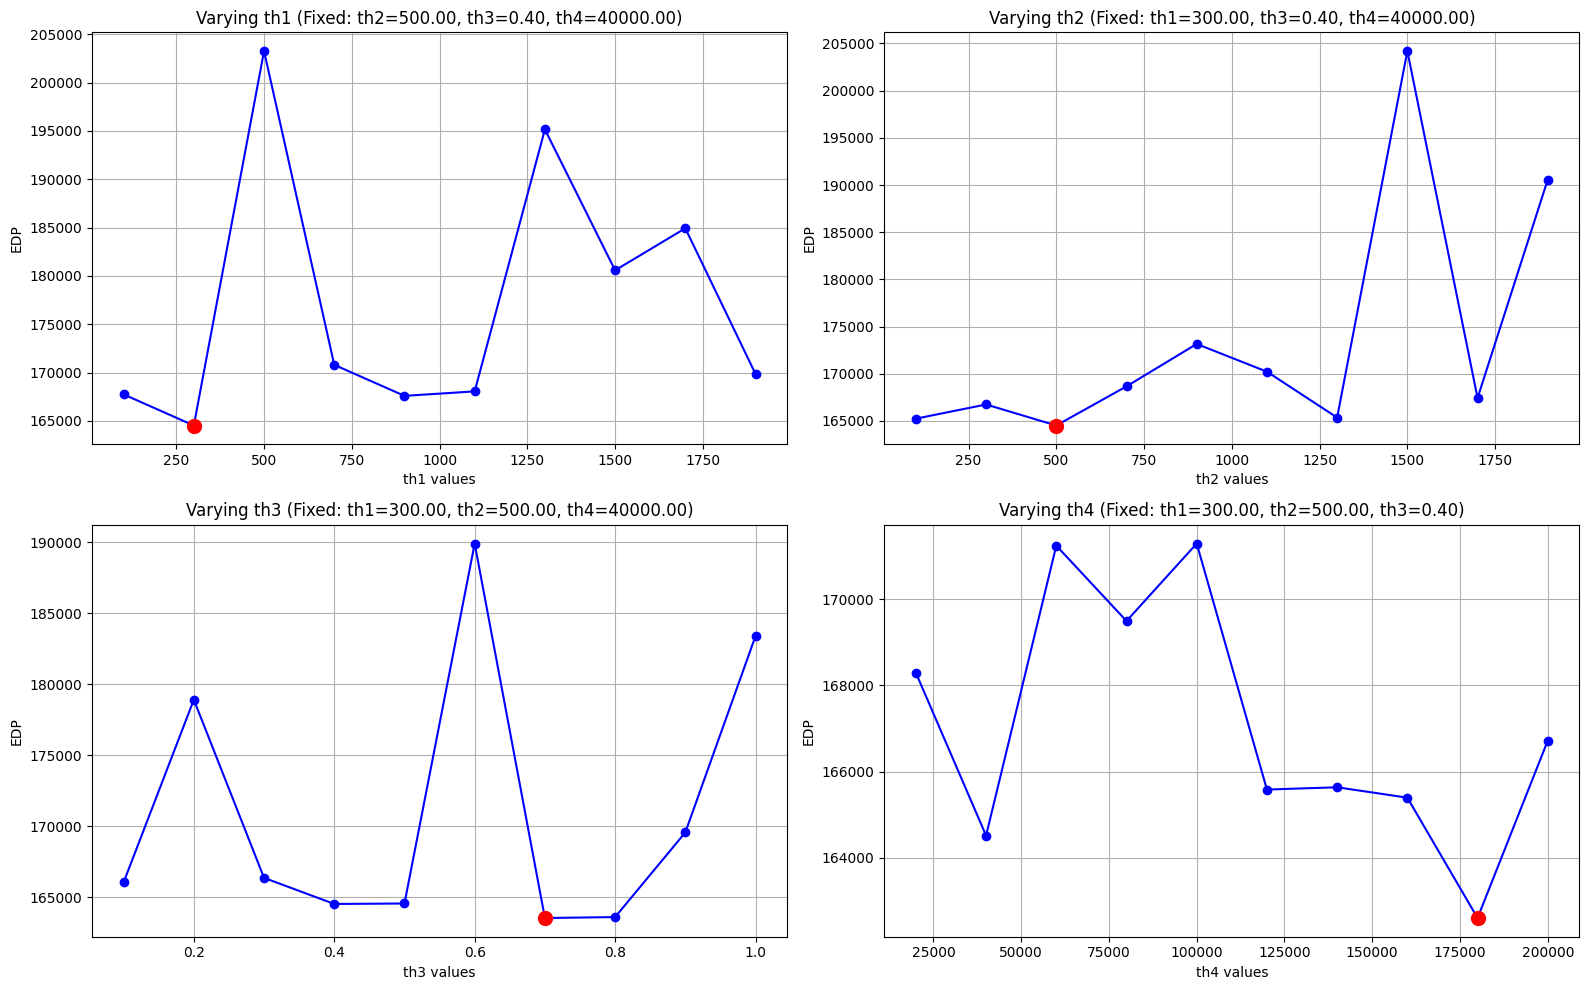

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

current_dir = "/home/cc/power/GPGPU/data/sensitivity/srad"

def extract_runtime(gpu_file):
    try:
        gpu_data = pd.read_csv(gpu_file)
        if "Time (s)" in gpu_data.columns:
            return gpu_data["Time (s)"].iloc[-1]
        else:
            print(f"Warning: 'Time (s)' column not found in {gpu_file}")
    except Exception as e:
        print(f"Error reading {gpu_file}: {e}")
    return None

def clean_data(df, column_name):
    if column_name in df.columns:
        df[column_name] = df[column_name].apply(lambda x: max(x, 0))
    return df

def calculate_energy(cpu_file, gpu_file):
    try:
        gpu_data = pd.read_csv(gpu_file)
        gpu_data = clean_data(gpu_data, "GPU 0 Power (W)")
        time_gpu = gpu_data["Time (s)"].values
        power_gpu = gpu_data["GPU 0 Power (W)"].values
        energy_gpu = sum((power_gpu[i] + power_gpu[i - 1]) / 2 * (time_gpu[i] - time_gpu[i - 1]) for i in range(1, len(time_gpu)))

        cpu_data = pd.read_csv(cpu_file)
        cpu_data = clean_data(cpu_data, "Package Power (W)")
        time_cpu = cpu_data["Time (s)"].values
        power_cpu = cpu_data["Package Power (W)"].values
        energy_cpu = sum((power_cpu[i] + power_cpu[i - 1]) / 2 * (time_cpu[i] - time_cpu[i - 1]) for i in range(1, len(time_cpu)))

        return energy_cpu + energy_gpu

    except Exception as e:
        print(f"Error processing {cpu_file} and {gpu_file}: {e}")
        return None

energy_data = []

for file in os.listdir(current_dir):
    if "gpu" in file and file.endswith(".csv"):
        gpu_file_path = os.path.join(current_dir, file)
        cpu_file_path = gpu_file_path.replace("_gpu", "_cpu")

        if os.path.exists(cpu_file_path):
            runtime = extract_runtime(gpu_file_path)
            energy = calculate_energy(cpu_file_path, gpu_file_path)

            if runtime is not None and energy is not None:
                try:
                    parts = file.replace(".csv", "").split("_")
                    th1 = float(parts[-4])
                    th2 = float(parts[-3])
                    th3 = float(parts[-2])
                    th4 = float(parts[-1])
                    energy_data.append({
                        "File": file,
                        "Runtime (seconds)": runtime,
                        "Energy (Joules)": energy,
                        "th1": th1, "th2": th2, "th3": th3, "th4": th4
                    })
                except ValueError:
                    print(f"Could not parse thresholds in: {file}")

df_energy = pd.DataFrame(energy_data)

if not df_energy.empty:
    df_energy["EDP"] = df_energy["Runtime (seconds)"] * df_energy["Energy (Joules)"]

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()

    threshold_names = ["th1", "th2", "th3", "th4"]
    fixed_sets = [("th2", "th3", "th4"), ("th1", "th3", "th4"), ("th1", "th2", "th4"), ("th1", "th2", "th3")]

    for i, fixed in enumerate(fixed_sets):
        varying = list(set(threshold_names) - set(fixed))[0]
        ax = axes[i]

        grouped = df_energy.groupby(list(fixed))
        selected_group = None
        for key, group in grouped:
            if group[varying].nunique() >= 10:
                selected_group = group.sort_values(by=varying).head(20)
                break

        if selected_group is not None:
            x_vals = selected_group[varying].values
            y_vals = selected_group["EDP"].values

            # Plot line and markers
            ax.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue')

            # Highlight the point with the minimum ED2P
            min_idx = y_vals.argmin()
            ax.plot(x_vals[min_idx], y_vals[min_idx], marker='o', color='red', markersize=10)

            fixed_str = ", ".join(f"{f}={selected_group.iloc[0][f]:.2f}" for f in fixed)
            ax.set_title(f"Varying {varying} (Fixed: {fixed_str})")
            ax.set_xlabel(f"{varying} values")
            ax.set_ylabel("EDP")
            ax.grid(True)
        else:
            ax.set_title(f"Not enough values to vary {varying}")
            ax.axis("off")

    plt.tight_layout()
    plt.show()


--- Processing bfs ---
Pareto-optimal thresholds for bfs:
Matching Pareto point for bfs:
A: th1=300.0, th2=500.0, th3=0.4, th4=200000.0
E: th1=300.0, th2=500.0, th3=0.4, th4=20000.0


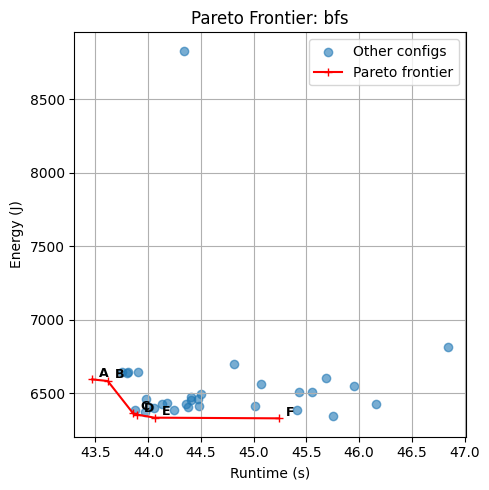


--- Processing gemm ---
Pareto-optimal thresholds for gemm:
B: th1=300.0, th2=500.0, th3=0.4, th4=60000.0


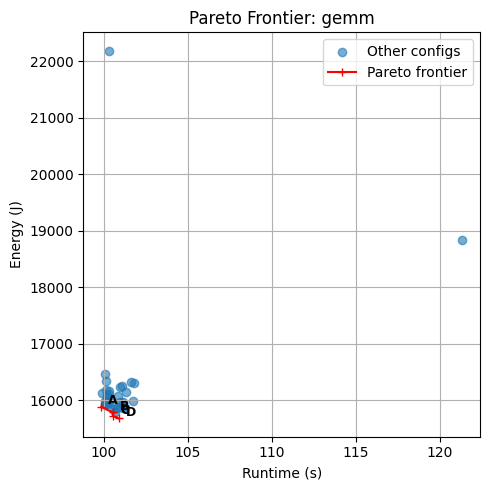


--- Processing pathfinder ---
Pareto-optimal thresholds for pathfinder:
B: th1=300.0, th2=500.0, th3=0.4, th4=200000.0


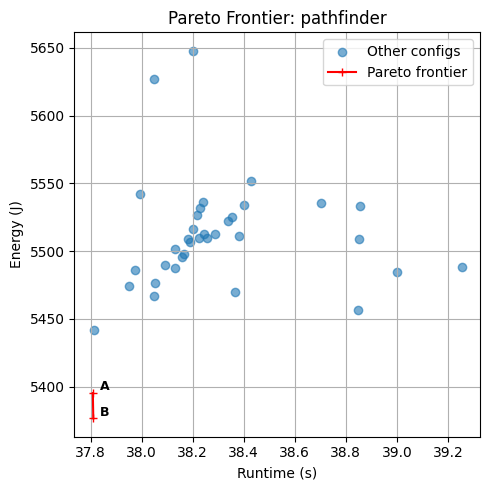


--- Processing sort ---
Pareto-optimal thresholds for sort:
B: th1=300.0, th2=500.0, th3=0.4, th4=180000.0


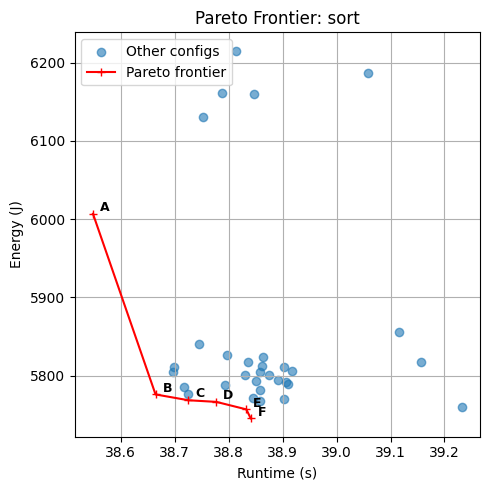


--- Processing cfd ---
Pareto-optimal thresholds for cfd:
A: th1=300.0, th2=500.0, th3=0.4, th4=100000.0


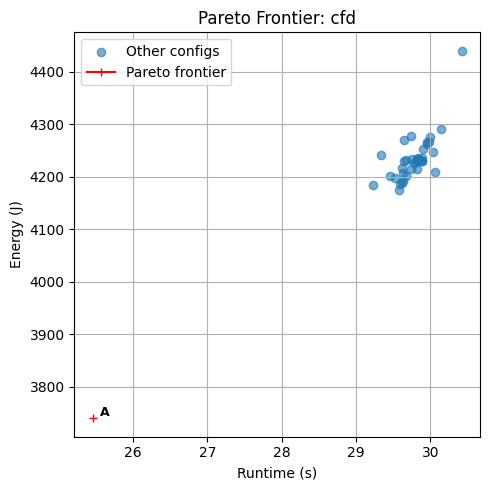


--- Processing cfd_double ---
Pareto-optimal thresholds for cfd_double:
A: th1=300.0, th2=500.0, th3=0.4, th4=160000.0


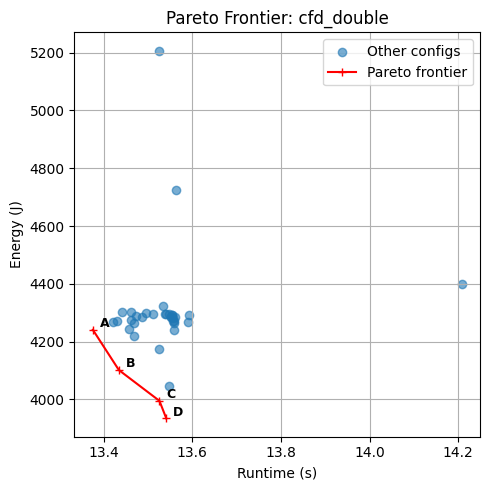


--- Processing fdtd2d ---
Pareto-optimal thresholds for fdtd2d:
A: th1=300.0, th2=500.0, th3=0.4, th4=40000.0
B: th1=300.0, th2=500.0, th3=0.4, th4=100000.0
C: th1=300.0, th2=500.0, th3=0.4, th4=180000.0


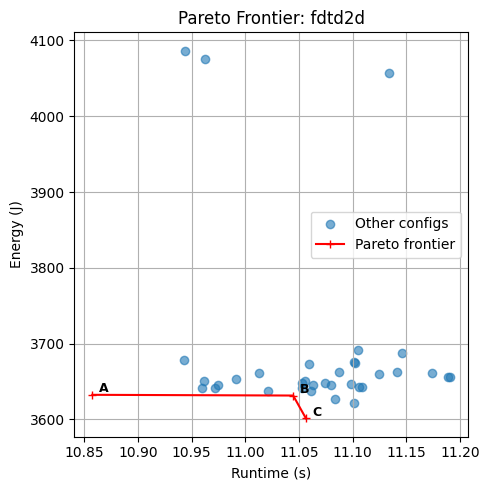


--- Processing kmeans ---
Pareto-optimal thresholds for kmeans:
F: th1=300.0, th2=500.0, th3=0.4, th4=200000.0


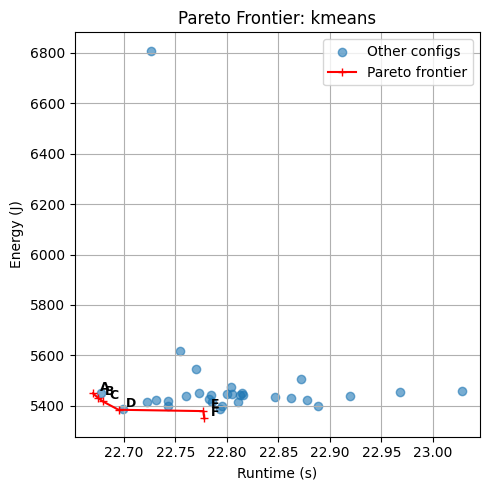


--- Processing lavamd ---
Pareto-optimal thresholds for lavamd:
A: th1=300.0, th2=500.0, th3=0.4, th4=20000.0
C: th1=300.0, th2=500.0, th3=0.4, th4=140000.0
E: th1=300.0, th2=500.0, th3=0.4, th4=60000.0


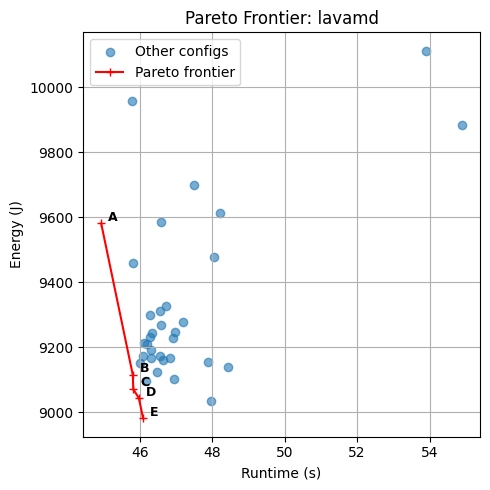


--- Processing nw ---
Pareto-optimal thresholds for nw:
D: th1=300.0, th2=500.0, th3=0.4, th4=180000.0


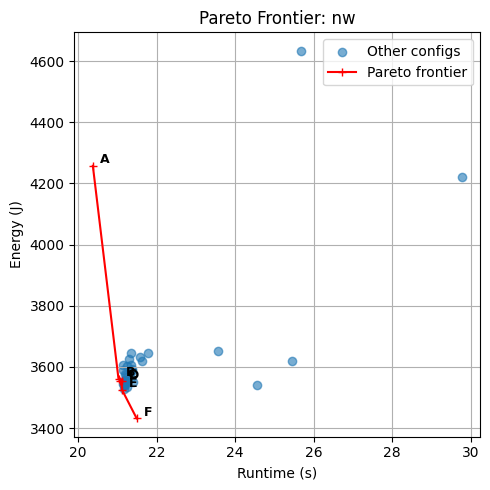


--- Processing particlefilter_float ---
Pareto-optimal thresholds for particlefilter_float:


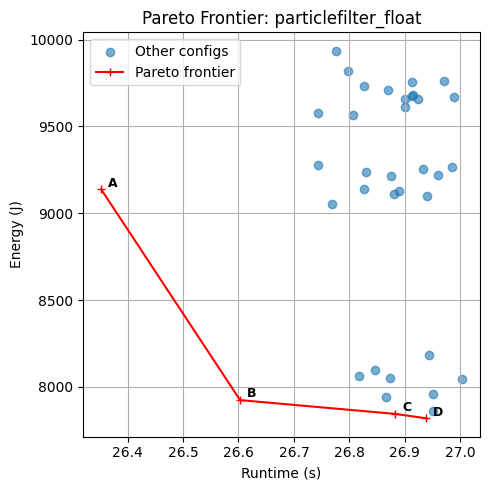


--- Processing raytracing ---
Pareto-optimal thresholds for raytracing:
A: th1=300.0, th2=500.0, th3=0.4, th4=60000.0
B: th1=300.0, th2=500.0, th3=0.4, th4=100000.0
C: th1=300.0, th2=500.0, th3=0.4, th4=40000.0


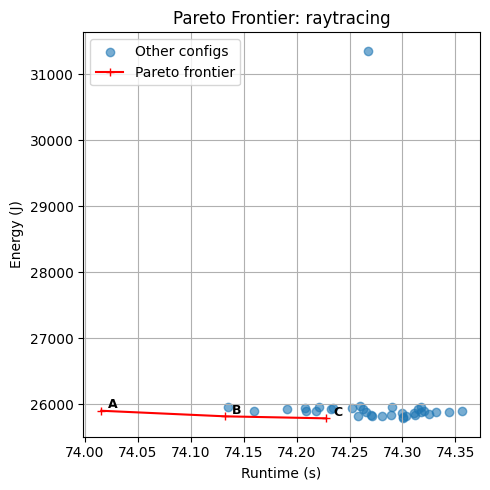


--- Processing where ---
Pareto-optimal thresholds for where:
E: th1=300.0, th2=500.0, th3=0.4, th4=40000.0
F: th1=300.0, th2=500.0, th3=0.4, th4=120000.0
G: th1=300.0, th2=500.0, th3=0.4, th4=160000.0


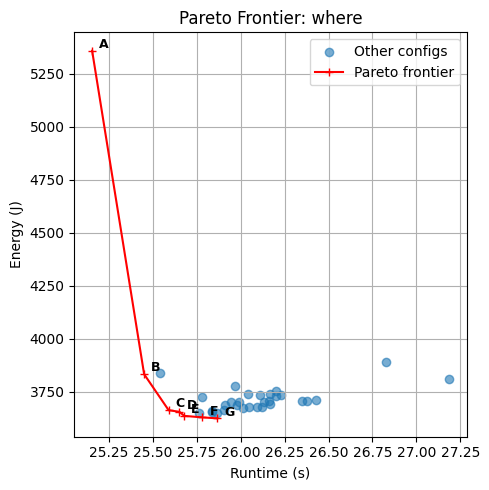

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

base_dir = "/home/cc/power/GPGPU/data/sensitivity"

benchmarks = [
    "bfs", "gemm", "pathfinder", "sort", "cfd", "cfd_double", "fdtd2d",
    "kmeans", "lavamd", "nw", "particlefilter_float", "raytracing", "where"
]
target_th1 = 300.0
target_th2 = 500.0
target_th3 = 0.4

target_found = False

def extract_runtime(gpu_file):
    try:
        gpu_data = pd.read_csv(gpu_file)
        if "Time (s)" in gpu_data.columns:
            return gpu_data["Time (s)"].iloc[-1]
    except Exception as e:
        print(f"Error reading {gpu_file}: {e}")
    return None

def clean_data(df, column_name):
    if column_name in df.columns:
        df[column_name] = df[column_name].apply(lambda x: max(x, 0))
    return df

def calculate_energy(cpu_file, gpu_file):
    try:
        gpu_data = pd.read_csv(gpu_file)
        gpu_data = clean_data(gpu_data, "GPU 0 Power (W)")
        time_gpu = gpu_data["Time (s)"].values
        power_gpu = gpu_data["GPU 0 Power (W)"].values
        energy_gpu = sum((power_gpu[i] + power_gpu[i - 1]) / 2 * (time_gpu[i] - time_gpu[i - 1]) for i in range(1, len(time_gpu)))

        cpu_data = pd.read_csv(cpu_file)
        cpu_data = clean_data(cpu_data, "Package Power (W)")
        time_cpu = cpu_data["Time (s)"].values
        power_cpu = cpu_data["Package Power (W)"].values
        energy_cpu = sum((power_cpu[i] + power_cpu[i - 1]) / 2 * (time_cpu[i] - time_cpu[i - 1]) for i in range(1, len(time_cpu)))

        return energy_cpu + energy_gpu

    except Exception as e:
        print(f"Error processing {cpu_file} and {gpu_file}: {e}")
        return None

def is_pareto_efficient(data):
    """Returns a boolean mask of Pareto-efficient points."""
    data = np.array(data)
    is_efficient = np.ones(data.shape[0], dtype=bool)
    for i in range(data.shape[0]):
        if is_efficient[i]:
            is_efficient[is_efficient] = (
                np.any(data[is_efficient] < data[i], axis=1)
                | np.all(data[is_efficient] == data[i], axis=1)
            )
            is_efficient[i] = True
    return is_efficient

# === Loop through each benchmark ===
for benchmark in benchmarks:
    print(f"\n--- Processing {benchmark} ---")
    current_dir = os.path.join(base_dir, benchmark)
    energy_data = []

    for file in os.listdir(current_dir):
        if "gpu" in file and file.endswith(".csv"):
            gpu_file_path = os.path.join(current_dir, file)
            cpu_file_path = gpu_file_path.replace("_gpu", "_cpu")

            if os.path.exists(cpu_file_path):
                runtime = extract_runtime(gpu_file_path)
                energy = calculate_energy(cpu_file_path, gpu_file_path)

                if runtime is not None and energy is not None:
                    try:
                        parts = file.replace(".csv", "").split("_")
                        th1 = float(parts[-4])
                        th2 = float(parts[-3])
                        th3 = float(parts[-2])
                        th4 = float(parts[-1])
                        label = f"{th1}_{th2}_{th3}_{th4}"
                        energy_data.append({
                            "Runtime (s)": runtime,
                            "Energy (J)": energy,
                            "Label": label
                        })
                    except ValueError:
                        print(f"Could not parse thresholds in: {file}")

    df = pd.DataFrame(energy_data)

    if not df.empty:
        runtimes = df["Runtime (s)"].values
        energies = df["Energy (J)"].values
        points = np.column_stack((runtimes, energies))

        is_pareto = is_pareto_efficient(points)
        pareto_points = df[is_pareto]
        non_pareto_points = df[~is_pareto]

        plt.figure(figsize=(5, 5))

        # Non-Pareto points
        plt.scatter(non_pareto_points["Runtime (s)"], non_pareto_points["Energy (J)"],
                    label="Other configs", alpha=0.6)

        # Pareto Frontier (sorted for line)
        pareto_sorted = pareto_points.sort_values("Runtime (s)")
        plt.plot(pareto_sorted["Runtime (s)"], pareto_sorted["Energy (J)"],
                 color="red", label="Pareto frontier", marker="+")

        # Generate Pareto point labels A, B, C, ...
        pareto_labels = [chr(65 + i) for i in range(len(pareto_sorted))]  # 65 = 'A'
        
        # Annotate plot and print corresponding thresholds
        print(f"Pareto-optimal thresholds for {benchmark}:")
        for i, (idx, row) in enumerate(pareto_sorted.iterrows()):
            point_label = pareto_labels[i]
            ths = row["Label"].split("_")
            plt.annotate(point_label, (row["Runtime (s)"], row["Energy (J)"]),
                         fontsize=9, fontweight='bold', xytext=(5, 2), textcoords='offset points')
        
            # Only print matching thresholds
            if (float(ths[0]) == target_th1 and
                float(ths[1]) == target_th2 and
                float(ths[2]) == target_th3):
                if not target_found:
                    print(f"Matching Pareto point for {benchmark}:")
                print(f"{point_label}: th1={ths[0]}, th2={ths[1]}, th3={ths[2]}, th4={ths[3]}")
                target_found = True
        

        plt.xlabel("Runtime (s)")
        plt.ylabel("Energy (J)")
        plt.title(f"Pareto Frontier: {benchmark}")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()



--- Processing bfs ---

Target threshold in bfs marked at A:
A: th1=300.0, th2=500.0, th3=0.4, th4=200000.0

--- Processing sort ---

Target threshold in sort marked at B:
B: th1=300.0, th2=500.0, th3=0.4, th4=180000.0

--- Processing cfd_double ---

Target threshold in cfd_double marked at A:
A: th1=300.0, th2=500.0, th3=0.4, th4=160000.0

--- Processing lavamd ---

Target threshold in lavamd marked at A:
A: th1=300.0, th2=500.0, th3=0.4, th4=20000.0


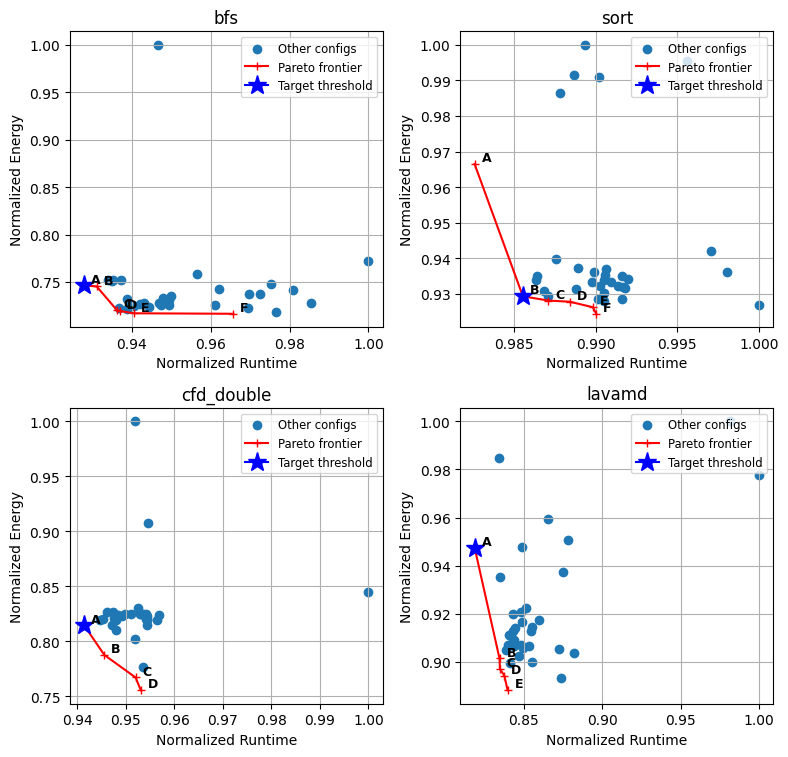

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

base_dir = "/home/cc/power/GPGPU/data/sensitivity"
benchmarks = ["bfs", "sort", "cfd_double", "lavamd"]

# Threshold to highlight
highlight_th1 = 300.0
highlight_th2 = 500.0
highlight_th3 = 0.4

def extract_runtime(gpu_file):
    try:
        gpu_data = pd.read_csv(gpu_file)
        if "Time (s)" in gpu_data.columns:
            return gpu_data["Time (s)"].iloc[-1]
    except Exception as e:
        print(f"Error reading {gpu_file}: {e}")
    return None

def clean_data(df, column_name):
    if column_name in df.columns:
        df[column_name] = df[column_name].apply(lambda x: max(x, 0))
    return df

def calculate_energy(cpu_file, gpu_file):
    try:
        gpu_data = pd.read_csv(gpu_file)
        gpu_data = clean_data(gpu_data, "GPU 0 Power (W)")
        time_gpu = gpu_data["Time (s)"].values
        power_gpu = gpu_data["GPU 0 Power (W)"].values
        energy_gpu = sum((power_gpu[i] + power_gpu[i - 1]) / 2 * (time_gpu[i] - time_gpu[i - 1]) for i in range(1, len(time_gpu)))

        cpu_data = pd.read_csv(cpu_file)
        cpu_data = clean_data(cpu_data, "Package Power (W)")
        time_cpu = cpu_data["Time (s)"].values
        power_cpu = cpu_data["Package Power (W)"].values
        energy_cpu = sum((power_cpu[i] + power_cpu[i - 1]) / 2 * (time_cpu[i] - time_cpu[i - 1]) for i in range(1, len(time_cpu)))

        return energy_cpu + energy_gpu

    except Exception as e:
        print(f"Error processing {cpu_file} and {gpu_file}: {e}")
        return None

def is_pareto_efficient(data):
    data = np.array(data)
    is_efficient = np.ones(data.shape[0], dtype=bool)
    for i in range(data.shape[0]):
        if is_efficient[i]:
            is_efficient[is_efficient] = (
                np.any(data[is_efficient] < data[i], axis=1)
                | np.all(data[is_efficient] == data[i], axis=1)
            )
            is_efficient[i] = True
    return is_efficient

# Prepare 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

# === Loop through each benchmark ===
for plot_idx, benchmark in enumerate(benchmarks):
    print(f"\n--- Processing {benchmark} ---")
    current_dir = os.path.join(base_dir, benchmark)
    energy_data = []

    for file in os.listdir(current_dir):
        if "gpu" in file and file.endswith(".csv"):
            gpu_file_path = os.path.join(current_dir, file)
            cpu_file_path = gpu_file_path.replace("_gpu", "_cpu")

            if os.path.exists(cpu_file_path):
                runtime = extract_runtime(gpu_file_path)
                energy = calculate_energy(cpu_file_path, gpu_file_path)

                if runtime is not None and energy is not None:
                    try:
                        parts = file.replace(".csv", "").split("_")
                        th1 = float(parts[-4])
                        th2 = float(parts[-3])
                        th3 = float(parts[-2])
                        th4 = float(parts[-1])
                        label = f"{th1}_{th2}_{th3}_{th4}"
                        energy_data.append({
                            "Runtime (s)": runtime,
                            "Energy (J)": energy,
                            "Label": label,
                            "th1": th1,
                            "th2": th2,
                            "th3": th3,
                            "th4": th4
                        })
                    except ValueError:
                        print(f"Could not parse thresholds in: {file}")

    df = pd.DataFrame(energy_data)
    ax = axes[plot_idx]

    if not df.empty:
        # Normalize runtime and energy
        df["Runtime norm"] = df["Runtime (s)"] / df["Runtime (s)"].max()
        df["Energy norm"] = df["Energy (J)"] / df["Energy (J)"].max()

        points = np.column_stack((df["Runtime norm"].values, df["Energy norm"].values))
        is_pareto = is_pareto_efficient(points)
        pareto_points = df[is_pareto]
        non_pareto_points = df[~is_pareto]

        # Plot non-Pareto points
        ax.scatter(non_pareto_points["Runtime norm"], non_pareto_points["Energy norm"],
                   label="Other configs")

        # Pareto frontier line
        pareto_sorted = pareto_points.sort_values("Runtime norm")
        ax.plot(pareto_sorted["Runtime norm"], pareto_sorted["Energy norm"],
                color="red", label="Pareto frontier", marker="+")

        pareto_labels = [chr(65 + i) for i in range(len(pareto_sorted))]
        target_marked = False

        for i, (idx, row) in enumerate(pareto_sorted.iterrows()):
            point_label = pareto_labels[i]
            ax.annotate(point_label, (row["Runtime norm"], row["Energy norm"]),
                        fontsize=9, fontweight='bold', xytext=(5, 2), textcoords='offset points')

            # Mark and print only the first matching threshold
            if (not target_marked and
                row["th1"] == highlight_th1 and
                row["th2"] == highlight_th2 and
                row["th3"] == highlight_th3):
                ax.plot(row["Runtime norm"], row["Energy norm"],
                        marker='*', color='blue', markersize=14, label="Target threshold")
                print(f"\nTarget threshold in {benchmark} marked at {point_label}:")
                print(f"{point_label}: th1={row['th1']}, th2={row['th2']}, th3={row['th3']}, th4={row['th4']}")
                target_marked = True

        ax.set_title(benchmark)
        ax.set_xlabel("Normalized Runtime")
        ax.set_ylabel("Normalized Energy")
        ax.grid(True)
        ax.legend(fontsize="small", loc="upper right")
    else:
        ax.set_title(f"{benchmark} - No data")
        ax.axis("off")

# plt.suptitle("Normalized Pareto Frontiers Across Benchmarks", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("/home/cc/power/GPGPU/data/fig/sensitivity_pareto_frontiers.png", dpi=300, bbox_inches='tight')
plt.show()